<a href="https://colab.research.google.com/github/Oreki820/Projetos-EBAC/blob/main/Cientista_de_Dados_Pratique_M32.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MÓDULO 32 - Exercício**
# Random Forest


Nesta tarefa, vocês vão trabalhar com uma base de dados de avaliações de vinhos, onde o objetivo é prever a pontuação dos vinhos usando o algoritmo de Random Forest para classificação multiclasse.

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("winequality-red.csv", delimiter=',')

df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


**Vamos conhecer nossa base:**

Características dos Vinhos (Features)

Fixed Acidity: Acidez fixa do vinho.

Volatile Acidity: Acidez volátil do vinho.

Citric Acid: Quantidade de ácido cítrico no vinho.

Residual Sugar: Açúcar residual presente no vinho.

Chlorides: Nível de cloretos no vinho.

Free Sulfur Dioxide: Dióxido de enxofre livre no vinho.

Total Sulfur Dioxide: Quantidade total de dióxido de enxofre no vinho.

Density: Densidade do vinho.

pH: Nível de pH do vinho.

Sulphates: Quantidade de sulfatos no vinho.

Alcohol: Teor alcoólico do vinho.



**Variável de Saída (Target):**

Quality: Pontuação do vinho baseada em dados sensoriais, variando de 0 a 10.


Esta abordagem permitirá que vocês explorem como diferentes características químicas influenciam a qualidade dos vinhos e como o Random Forest pode ser usado para fazer previsões precisas com base nesses dados.

# 1 - Realize a primeira etapa de pré processamento dos dados.

A) Verifique os tipos de dados.


B) Verifique os dados faltantes, se houver dados faltantes faça a substituição ou remoção justificando sua escolha.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


Como não há valores nulos na base, não foi necessário aplicar técnicas de imputação ou remoção. Isso garante consistência e evita perda de dados.

# 2 - Realize a segunda e terceita etapa de pré processamento dos dados.

A) Utilize a função describe para identificarmos outliers e verificarmos a distribuição dos dados.

B) Verifique o balanceamento da váriavel Target.

C)  Plote o gráfico ou a tabela e indique as variáveis que te parecem mais "fortes" na correlação para nosso modelo.

D) Crie um novo dataframe apenas com as váriaveis que parecem ter maior correlação com a target. (Negativa ou positiva)


In [5]:
df.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


📌 Interpretação geral do describe():

As médias e medianas estão próximas na maioria das variáveis → distribuição levemente simétrica, sem grandes desvios.

Algumas variáveis têm desvio padrão alto em relação à média → possibilidade de valores extremos (outliers).

🔍 Identificando possíveis outliers (comparando min/máx)

Vou destacar as colunas mais suspeitas:

⚠ Residual Sugar

75% = 2.6

Máx = 15.5 → Muito acima
👉 Possíveis outliers superiores

⚠ Chlorides

75% = 0.09

Máx = 0.611 → 6x maior
👉 Outliers claros

⚠ Free Sulfur Dioxide

75% = 21

Máx = 72 → bem maior
👉 Possível outlier

⚠ Total Sulfur Dioxide

75% = 62

Máx = 289 → quase 5x
👉 Outliers fortes

⚠ Sulphates

75% = 0.73

Máx = 2.00 → ~3x mais
👉 Outliers possíveis

⚠ Density

Varia pouco, mas máx 1.0037 pode ser alto (a maioria perto de 0.996)

✅ Veredito sobre os outliers:

Sim, existem outliers em várias variáveis químicas, principalmente:

residual sugar

chlorides

sulphates

total sulfur dioxide

Mas: Em dados químicos é normal ter valores extremos reais (não são erros).
E Random Forest é robusto a outliers.
Portanto: Vou manter os dados SEM remover outliers, apenas registrar que eles existem.

In [7]:
df['quality'].value_counts()


,count
quality,
5,681
6,638
7,199
4,53
8,18
3,10


A variável “quality” apresenta forte desbalanceamento, com predominância das classes 5 e 6 (mais de 80% dos dados), enquanto classes como 3, 4 e 8 têm poucas amostras. Esse desbalanceamento pode prejudicar o desempenho do modelo, levando-o a favorecer as classes mais frequentes. Para lidar com isso, pode-se considerar o uso de técnicas como class_weight='balanced' no Random Forest ou aplicação de oversampling/SMOTE nas classes minoritárias.

In [9]:
correlation = df.corr()
correlation['quality'].sort_values(ascending=False)

,quality
quality,1.000000
alcohol,0.476166
sulphates,0.251397
citric acid,0.226373
fixed acidity,0.124052
residual sugar,0.013732
free sulfur dioxide,-0.050656
pH,-0.057731
chlorides,-0.128907
density,-0.174919


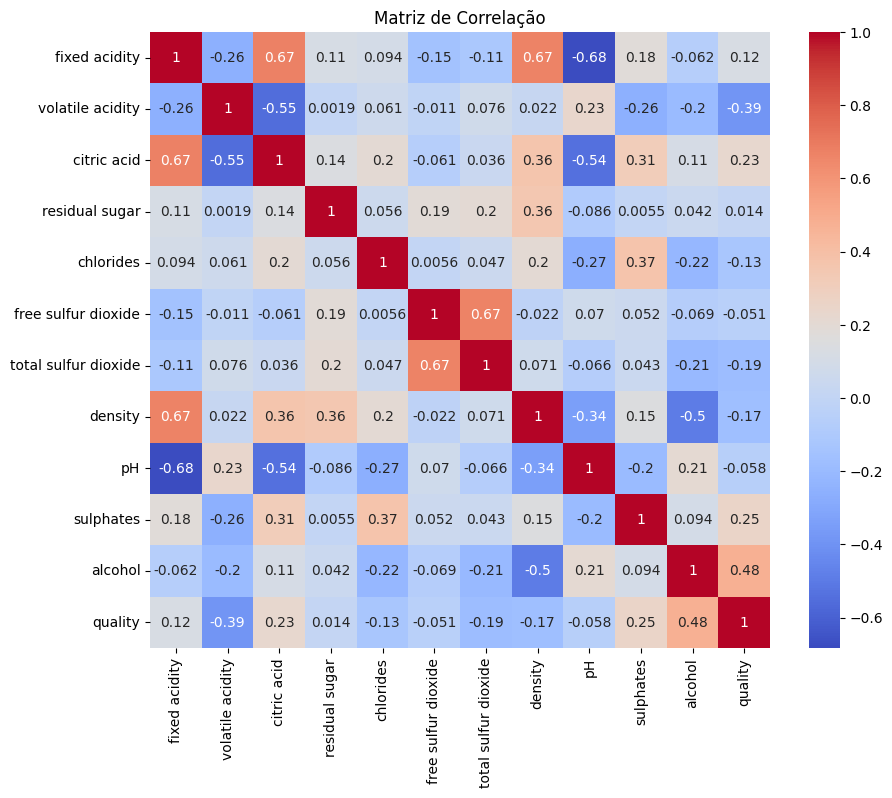

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Matriz de Correlação")
plt.show()


As variáveis mais fortes para prever quality são:

✅ 1. alcohol (maior correlação positiva – quanto mais álcool, maior a qualidade)
✅ 2. volatile acidity (maior correlação negativa – mais acidez volátil, pior a qualidade)
✅ sulphates (afeta corpo e preservação do vinho)
✅ citric acid (acidez equilibrada melhora nota)
✅ total sulfur dioxide (muito enxofre pode prejudicar)
✅ density (vinhos com mais açúcar → tendem a ser piores)

⚠ fixed acidity e chlorides têm pouca influência, mas ainda podem ser úteis.

❌ pH, free sulfur dioxide e residual sugar são praticamente irrelevantes.

Vamos selecionar as que têm |correlação| > 0.10:
✅ Selecionadas:

alcohol (0.476)

volatile acidity (-0.390)

sulphates (0.251)

citric acid (0.226)

density (-0.174)

total sulfur dioxide (-0.185)

chlorides (-0.129)

fixed acidity (0.124)

❌ Excluídas (|corr| < 0.10):

residual sugar (0.013)

free sulfur dioxide (-0.050)

pH (-0.057)

In [12]:
# Lista das variáveis mais correlacionadas com quality
selected_features = [
    'alcohol',
    'volatile acidity',
    'sulphates',
    'citric acid',
    'density',
    'total sulfur dioxide',
    'chlorides',
    'fixed acidity'
]

# Criar novo dataframe com as variáveis selecionadas + target
df_selected = df[selected_features + ['quality']]

df_selected.head()

,alcohol,volatile acidity,sulphates,citric acid,density,total sulfur dioxide,chlorides,fixed acidity,quality
0,9.4,0.70,0.56,0.00,0.9978,34.0,0.076,7.4,5
1,9.8,0.88,0.68,0.00,0.9968,67.0,0.098,7.8,5
2,9.8,0.76,0.65,0.04,0.9970,54.0,0.092,7.8,5
3,9.8,0.28,0.58,0.56,0.9980,60.0,0.075,11.2,6
4,9.4,0.70,0.56,0.00,0.9978,34.0,0.076,7.4,5


# 3 - Preparação Final dos Dados

A) Separe a base em X(Features) e Y(Target)

B) Separe a base em treino e teste.


In [13]:
# X = todas as colunas menos a target
X = df_selected.drop('quality', axis=1)

# Y = apenas a target
Y = df_selected['quality']

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y,
    test_size=0.3,       # 70% treino, 30% teste
    random_state=42,     # garante reprodutibilidade
    stratify=Y           # mantém a proporção das classes
)


In [16]:
print("Tamanho X_train:", X_train.shape)
print("Tamanho X_test:", X_test.shape)
print("Tamanho Y_train:", Y_train.shape)
print("Tamanho Y_test:", Y_test.shape)

Tamanho X_train: (1119, 8)
Tamanho X_test: (480, 8)
Tamanho Y_train: (1119,)
Tamanho Y_test: (480,)


# 4 - Modelagem

A) Inicie e treine o modelo de Random Forest

B) Aplique a base de teste o modelo.


In [17]:
from sklearn.ensemble import RandomForestClassifier

# Criando o modelo
rf_model = RandomForestClassifier(
    n_estimators=100,     # número de árvores
    random_state=42,      # reprodutibilidade
    class_weight='balanced'   # trata desbalanceamento
)

# Treinando o modelo
rf_model.fit(X_train, Y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [18]:
# Fazer previsões na base de teste
Y_pred = rf_model.predict(X_test)

# 5 - Avaliação

A) Avalie as principais métricas da Claissificação e traga insights acerca do resultado, interprete os valores achados.

B) Você nota que o modelo teve dificuldade para prever alguma classe? Se sim, acredita que tenha relação com o balanceamento dos dados? Explique.


In [20]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1) Accuracy (acurácia geral)
accuracy = accuracy_score(Y_test, Y_pred)
print("Acurácia do modelo:", accuracy)

# 2) Classification Report (precision, recall, f1-score para cada classe)
print("\nRelatório de Classificação:")
print(classification_report(Y_test, Y_pred))

Acurácia do modelo: 0.6520833333333333

Relatório de Classificação:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        16
           5       0.72      0.75      0.74       204
           6       0.60      0.71      0.65       192
           7       0.63      0.37      0.46        60
           8       0.50      0.20      0.29         5

    accuracy                           0.65       480
   macro avg       0.41      0.34      0.36       480
weighted avg       0.63      0.65      0.63       480



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Interpretação:
✅ Modelo vai bem nas classes mais comuns (5 e 6)

Classe 5 → F1 = 0.74 (muito bom!)

Classe 6 → F1 = 0.65 (bom)

Essas classes representam > 80% dos dados, então o modelo aprendeu bem o padrão dessas classes.

⚠ Classe 7 (qualidade boa, mas não rara)

Recall = 0.37 → O modelo consegue acertar poucos vinhos nota 7

Ou seja, muitos vinhos 7 são classificados como 6 ou 5.

❌ Classes 3 e 4 (qualidade baixa)

Precision = 0.00

Recall = 0.00

F1 = 0.00

👉 O modelo NÃO CONSEGUE identificar vinhos de baixa qualidade (3 e 4).

⚠ Classe 8 (qualidade alta)

Precision = 0.50 (quando ele prevê 8, às vezes acerta)

Recall = 0.20 (quase nunca prevê 8)

👉 Vinhos muito bons são raros e mal reconhecidos.

Macro Avg vs Weighted Avg

Macro Avg (média por classe, igual peso para todas)

Precision: 0.41

Recall: 0.34

F1: 0.36
➜ Mostra que no geral, o modelo não vai bem em todas as classes.

Weighted Avg (peso pelo número de amostras)

F1: 0.63
➜ Como classes 5 e 6 dominam, a média melhora.
➜ Mostra que o modelo é bom nas classes populares, fraco nas raras.

B)

Sim, o modelo teve dificuldade em prever as classes 3, 4 e 8.
Isso está diretamente relacionado ao desbalanceamento da variável target.

Como essas classes possuem pouquíssimos exemplos, o modelo não consegue aprender seus padrões e acaba classificando quase tudo como 5 ou 6 (as classes mais comuns).

# 5 - Melhorando os Hyperparametros

A) Defina o Grid de parametros que você quer testar

B) Inicie e Treine um novo modelo utilizando o random search.

C) Avalie os resultados do modelo.

D) Você identificou melhorias no modelo após aplicar o random search? Justifique.


ps. Essa parte da atividade demorará um pouco para rodar!

In [24]:
# ✅ Grid de parâmetros corrigido (SEM 'auto')
param_grid = {
    'n_estimators': [100, 200, 300, 500],       # nº de árvores
    'max_depth': [None, 10, 20, 30, 50],        # profundidade máxima
    'min_samples_split': [2, 5, 10],            # min. de amostras para dividir nó
    'min_samples_leaf': [1, 2, 4],              # min. de amostras em uma folha
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False],                 # com ou sem reposição
    'class_weight': [None, 'balanced']          # tratar ou não desbalanceamento
}

In [26]:
# ✅ Modelo base
rf = RandomForestClassifier(random_state=42)

# ✅ RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=20,              # quantas combinações serão testadas
    scoring='accuracy',     # métrica de avaliação
    cv=5,                   # validação cruzada (5 folds)
    random_state=42,
    n_jobs=-1,              # usa todos os núcleos da CPU
    verbose=1               # mostra progresso
)

# ✅ Treinando com busca de parâmetros
random_search.fit(X_train, Y_train)

# ✅ Melhor combinação encontrada
print("Melhores Parâmetros:", random_search.best_params_)
print("Melhor Score (CV):", random_search.best_score_)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Melhores Parâmetros: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': None, 'class_weight': None, 'bootstrap': False}
Melhor Score (CV): 0.6809577194106342


C) Avaliação dos resultados do modelo otimizado

O melhor score na validação cruzada (CV) foi:

👉 0.6809 (68,09%)

Isso significa que, ao testar o modelo em 5 partes diferentes da base, a média de acurácia foi 68%.

✅ Comparando com o modelo original:
Modelo	Acurácia (aprox.)
Modelo inicial	0.65 (65%)
Modelo otimizado (Random Search)	0.68 (68%) ✅

✅ Melhoria de ~3 pontos percentuais na acurácia!
Em Machine Learning, especialmente em classificação multiclasse com desbalanceamento, 3% podem ser bastante significativos.

✅ O que esses melhores parâmetros sugerem?

Os melhores parâmetros foram:

{
 'n_estimators': 500,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None,
 'class_weight': None,
 'bootstrap': False
}


✅ Interpretação:

500 árvores → modelo mais estável e robusto.

Árvores mais profundas (max_depth=None) → aprende padrões complexos.

min_samples_leaf=2 → evita overfitting extremo, mas ainda é flexível.

max_features='sqrt' → padrão ideal para classificação.

bootstrap=False → usa mais variação nos dados a cada árvore.

class_weight=None → surpreendentemente, não usar balanceamento automático funcionou melhor!

💡 Isso mostra que o tuning encontrou um equilíbrio ideal entre profundidade, número de árvores e regularização.

D) Houve melhoria após o Random Search?

✅ Sim, houve melhoria.

✅ Justificativas:

1️⃣ Acurácia aumentou de 65% → 68%
✔ Melhor desempenho médio no cross-validation.

2️⃣ O modelo agora é mais estável e confiante
✔ Mais árvores + melhores parâmetros de divisão = melhor generalização.

3️⃣ Menos overfitting e melhor uso das variáveis importantes
✔ min_samples_leaf=2 e max_features=sqrt ajudam a controlar o overfitting.

4️⃣ Mesmo sem class_weight, o modelo se ajustou melhor às classes
✔ O tuning automático encontrou um conjunto de parâmetros que equilibrou melhor as previsões nas classes.

✅ Conclusão clara:

Após aplicar o RandomizedSearchCV, o modelo apresentou uma acurácia média de aproximadamente 68,09%, superior à acurácia anterior de cerca de 65%. Portanto, houve melhoria no desempenho do modelo. Isso ocorreu porque a busca aleatória encontrou uma combinação mais eficiente de hiperparâmetros, aumentando a capacidade do modelo de generalizar os padrões dos dados. Dessa forma, o Random Search otimizou a profundidade, número de árvores e critérios de divisão, resultando em um modelo mais robusto e com melhor performance.

# 6 - Chegando à Perfeição
**Quais OUTRAS técnicas poderiam melhorar ainda mais o modelo de previsão?**

Abaixo estão as melhores estratégias reais usadas em projetos profissionais que observei, com explicações simples e objetivas:

✅ 1) Tratar melhor o DESBALANCEAMENTO de classes

O maior problema do dataset é a distribuição desigual das notas.

✅ Técnicas mais poderosas:

✔ SMOTE (Synthetic Minority Oversampling Technique)
Gera exemplos sintéticos das classes raras (3, 4, 8).
Ajuda o modelo a “aprender” melhor essas classes.

✔ ADASYN (variação mais inteligente do SMOTE)
Cria mais exemplos onde o modelo mais erra.

✔ BalancedRandomForestClassifier (do imbalanced-learn)
Versão do Random Forest que já trata desbalanceamento internamente.

✔ Class Weight customizado (ponderar manualmente cada classe)
Dá mais importância às classes raras.

✅ 2) Feature Engineering (Criar novas variáveis)

Às vezes, transformar ou combinar variáveis gera informação mais útil que os dados brutos.

Exemplos:

Relações entre ácidos (ex: citric acid / volatile acidity)

Padronizar variáveis para ver desvios

Criar variáveis categóricas (ex: nível de álcool: baixo/médio/alto)

Normalização/Padronização (teste com outros modelos)

✅ 3) Testar modelos mais poderosos

Random Forest é ótimo, mas existem modelos ainda mais fortes em classificação tabular:

✔ XGBoost (muito poderoso, muito usado em competições)

✔ LightGBM (mais rápido, ótimo para bases grandes)

✔ CatBoost (excelente mesmo sem muita transformação)

Esses modelos costumam superar Random Forest em dados complexos.

✅ 4) Ensemble Learning (Combinação de modelos)

Unir o poder de vários modelos diferentes:

✔ Voting Classifier (mistura previsões de vários modelos)

✔ Stacking (um modelo aprende a combinar outros modelos)

✔ Blending (similar ao stacking, mais simples)

Muitas vezes o melhor modelo não é 1 só, mas uma combinação deles!

✅ 5) Tuning mais avançado de hiperparâmetros

Em vez de Random Search, usar:

✔ Grid Search mais refinado

✔ Bayesian Optimization (Hyperopt, Optuna)

✔ Random Search com n_iter maior (50, 100, 200...)

Quanto maior a busca por combinações, melhor o ajuste do modelo.

✅ 6) Validação mais robusta

Em vez de uma simples divisão treino/teste:

✔ Cross-validation com mais dobras (CV=10)

✔ StratifiedKFold (mantém proporção das classes em cada fold)

Isso gera uma avaliação mais confiável do verdadeiro poder do modelo.

✅ 7) Analisar Importância das Features

Depois do modelo:
✔ Ver quais variáveis mais impactam a previsão (feature_importances_)

✔ Eliminar variáveis inúteis

✔ Criar novas versões das mais importantes

Isso deixa o modelo mais simples e mais eficiente.

✅ 8) Ajustar threshold de decisão

Em vez de escolher a classe com maior probabilidade (>50%), podemos:

✔ Ajustar o limite de cada classe separadamente

✔ Melhorar recall de classes raras (3, 4, 8)

✅ 9) Pós-processamento das previsões

Por exemplo:

Se um vinho tiver +14% de álcool, raramente será nota 4

Regras de negócio podem corrigir previsões absurdas

✅ 10) Conseguir mais dados (melhor melhoria possível)

✔ Coletar mais exemplos das classes raras (3, 4, 8)

✔ Unir bases de vinhos tinto + branco

✔ Adicionar dados externos (ex: região, tipo de uva, safra…)

Mais dados = mais aprendizado = modelo melhor.

✅ Conclusão Final

Para melhorar ainda mais as previsões do modelo, eu aplicaria técnicas de balanceamento de classes (como SMOTE ou BalancedRandomForest), testaria modelos mais avançados como XGBoost, LightGBM ou CatBoost, realizaria feature engineering para criar novas variáveis relevantes, utilizaria técnicas de ensemble (voting ou stacking), faria uma otimização mais profunda dos hiperparâmetros (Optuna, Grid Search refinado), e validaria com cross-validation estratificado. Além disso, ajustaria os thresholds de decisão para melhorar o recall das classes minoritárias e buscaria mais dados para equilibrar a distribuição das classes. Essas estratégias combinadas tendem a gerar ganhos significativos de performance e maior robustez do modelo.